In [172]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import zipfile
import os

from helper_functions import *

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [60]:
zip_file = 'Data/cook_county_data.zip'
extract_path = 'Data/cook_county_data'  # Expected extraction folder

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall(extract_path)
else:
    print("Files already extracted.")

Files already extracted.


In [62]:
training_data = pd.read_csv("cook_county_train.csv", index_col = 'Unnamed: 0')

In [63]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [66]:
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,7,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0


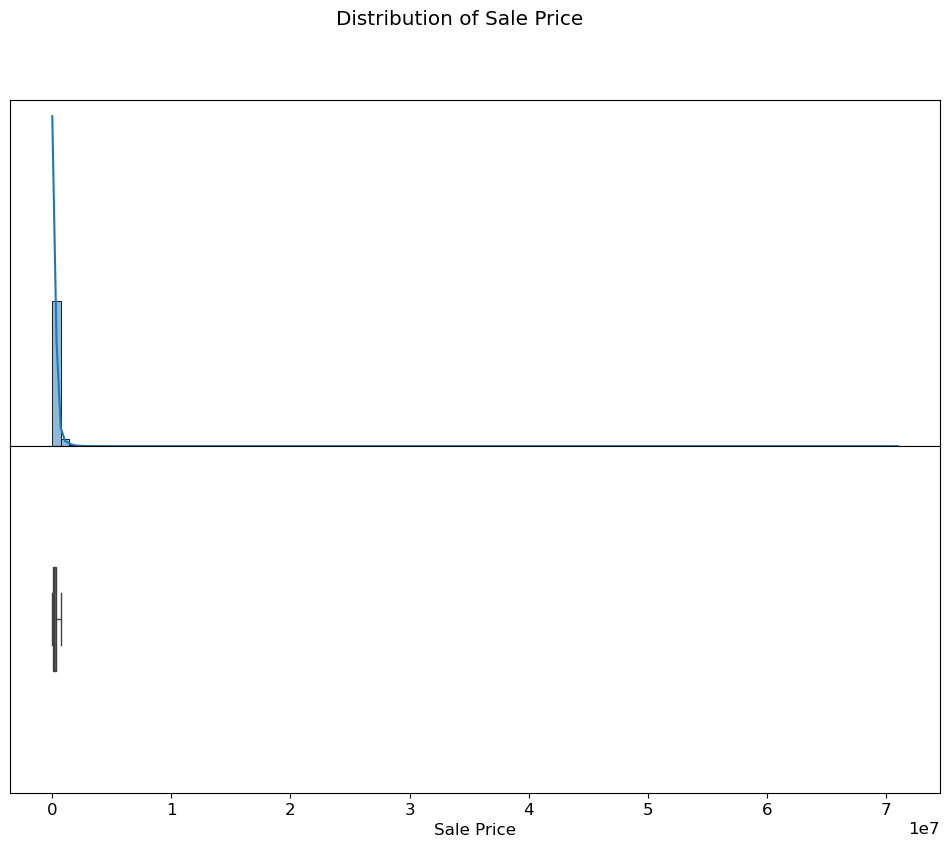

In [100]:
plot_distribution(training_data, label = 'Sale Price', rows = 2)

In [103]:
training_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

In [112]:
training_data = log_transform(training_data, 'Sale Price')

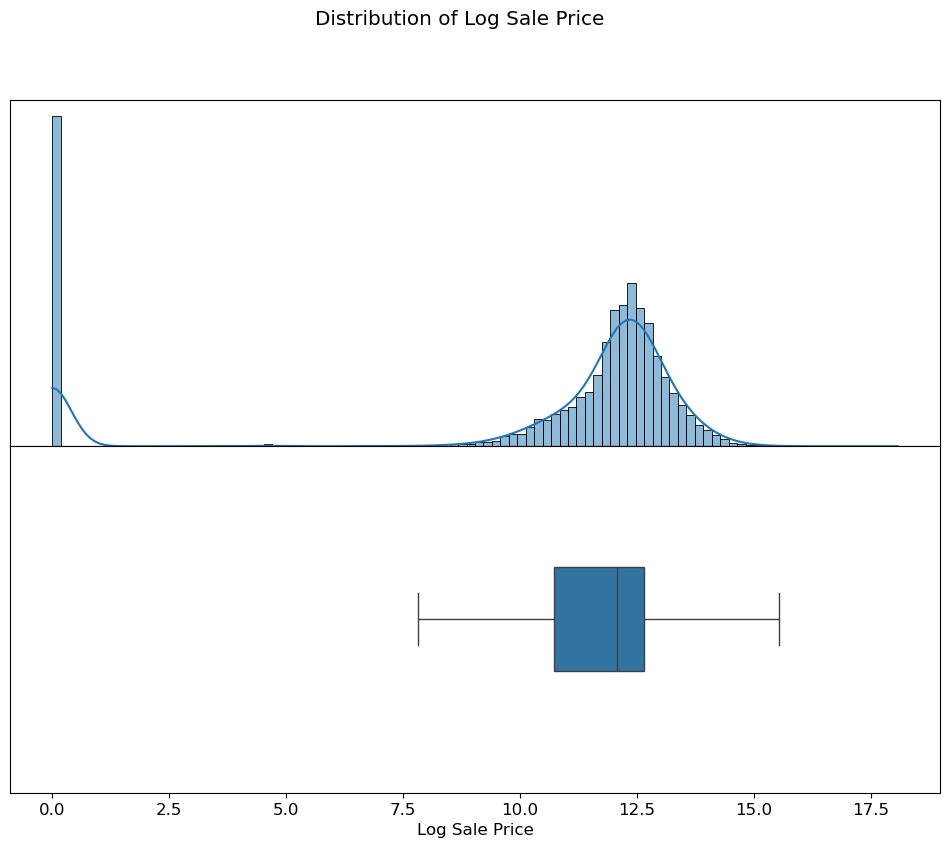

In [115]:
plot_distribution(training_data, label = 'Log Sale Price', rows = 2)

In [121]:
training_data = remove_outliers(training_data, 'Sale Price', lower = 500)

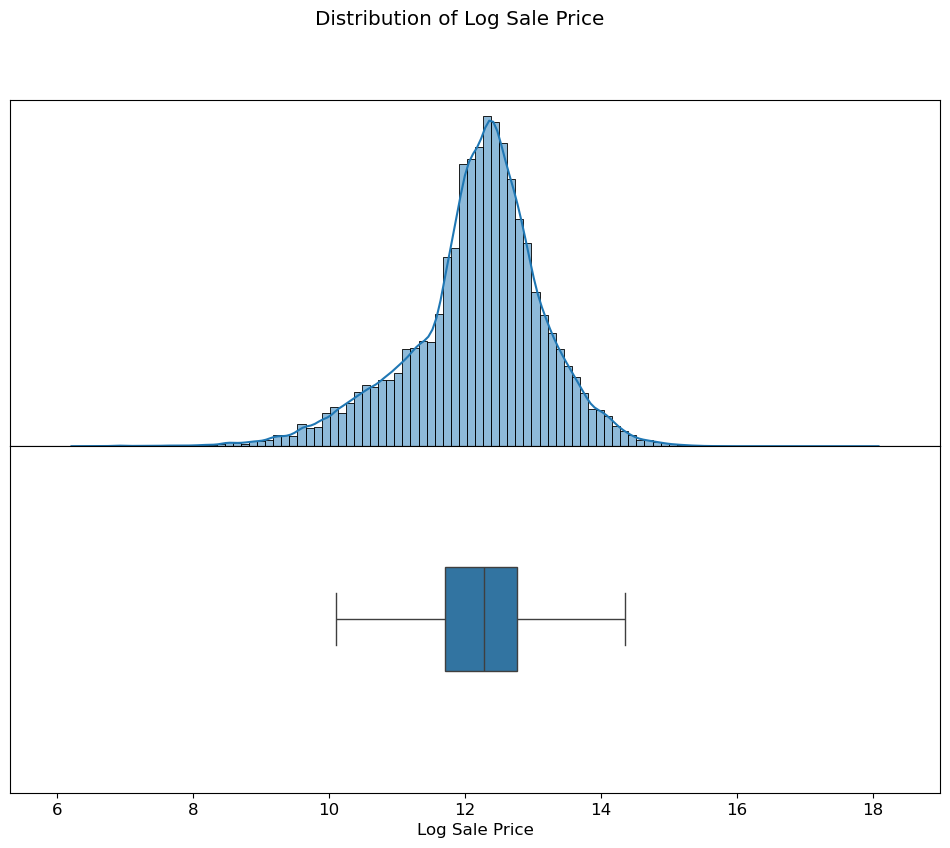

In [124]:
plot_distribution(training_data, label = 'Log Sale Price', rows = 2)

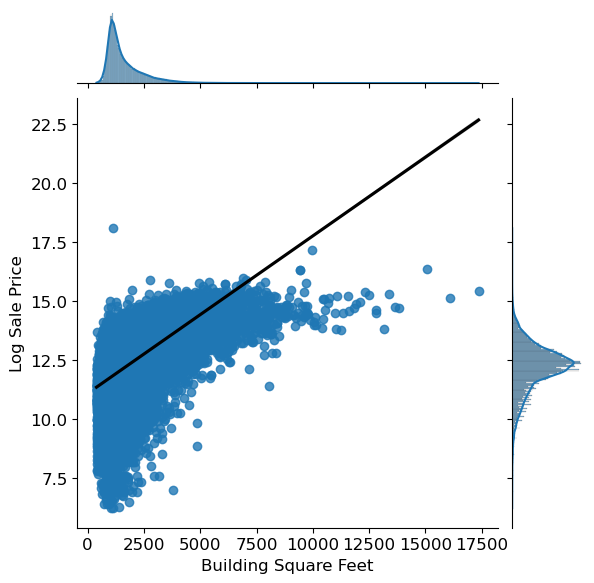

In [127]:
sns.jointplot(data = training_data, x = 'Building Square Feet', y = 'Log Sale Price', kind = 'reg', line_kws = {'color':'black'})

In [130]:
training_data= log_transform(training_data, 'Building Square Feet')

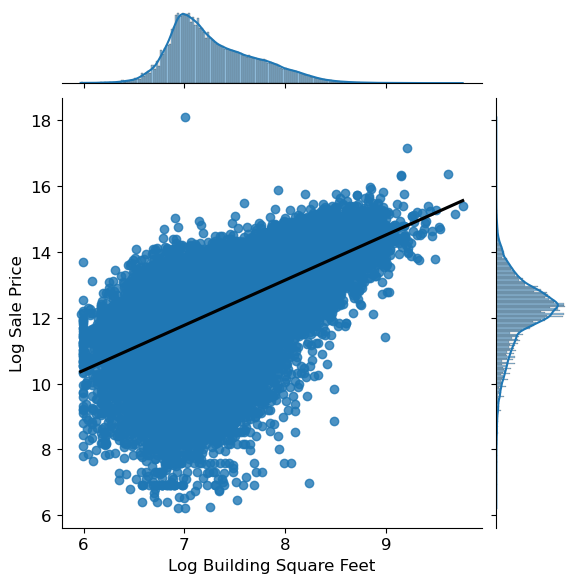

In [133]:
sns.jointplot(data = training_data, x = 'Log Building Square Feet', y = 'Log Sale Price', kind = 'reg', line_kws = {'color':'black'})

In [136]:
training_data['Description'][1]

'This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

In [139]:
training_data['Description'][8]

'This property, sold on 08/25/2016, is a two-story houeshold located at 3940 N CHRISTIANA AVE.It has a total of 8 rooms, 4 of which are bedrooms, and 2.0 of which are bathrooms.'

In [142]:
training_data['Description'][17]

'This property, sold on 06/29/2016, is a one-story houeshold located at 131 DETROIT ST.It has a total of 7 rooms, 3 of which are bedrooms, and 1.5 of which are bathrooms.'

In [147]:
training_data = add_bathrooms(training_data)
training_data = add_bedrooms(training_data)
training_data = add_total_rooms(training_data)

<Axes: xlabel='Bathrooms', ylabel='Log Sale Price'>

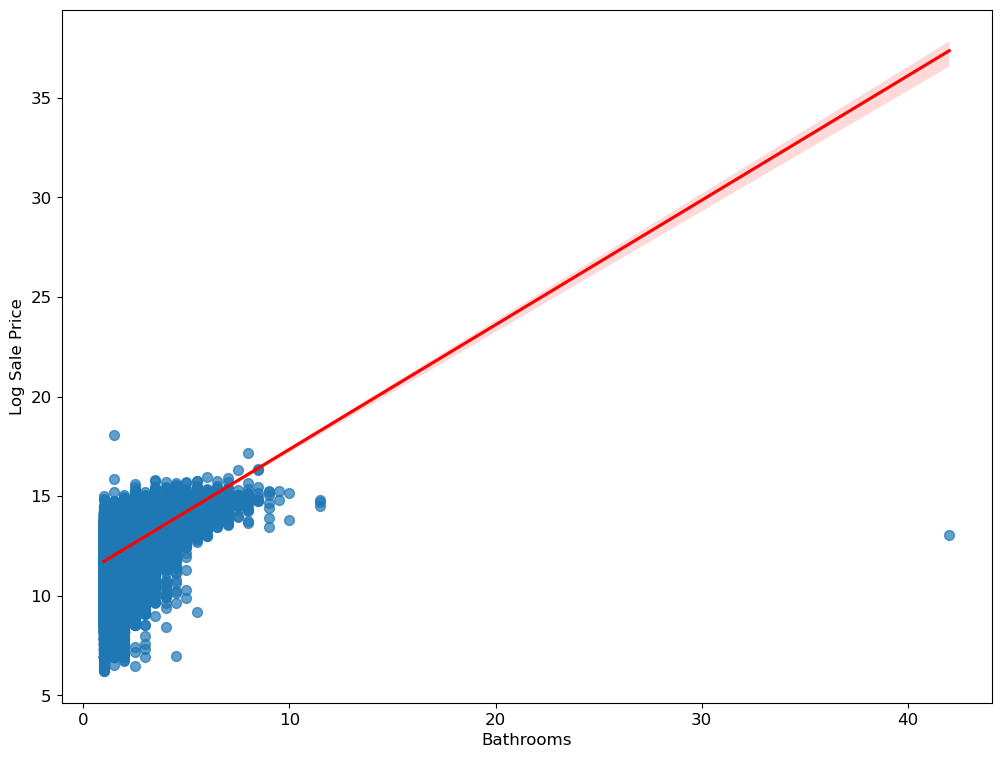

In [150]:
sns.regplot(x='Bathrooms', y='Log Sale Price', data = training_data, 
            scatter_kws = {'s':50, 'alpha':0.7}, 
            line_kws = {'color':'red'})

<Axes: xlabel='Bedrooms', ylabel='Log Sale Price'>

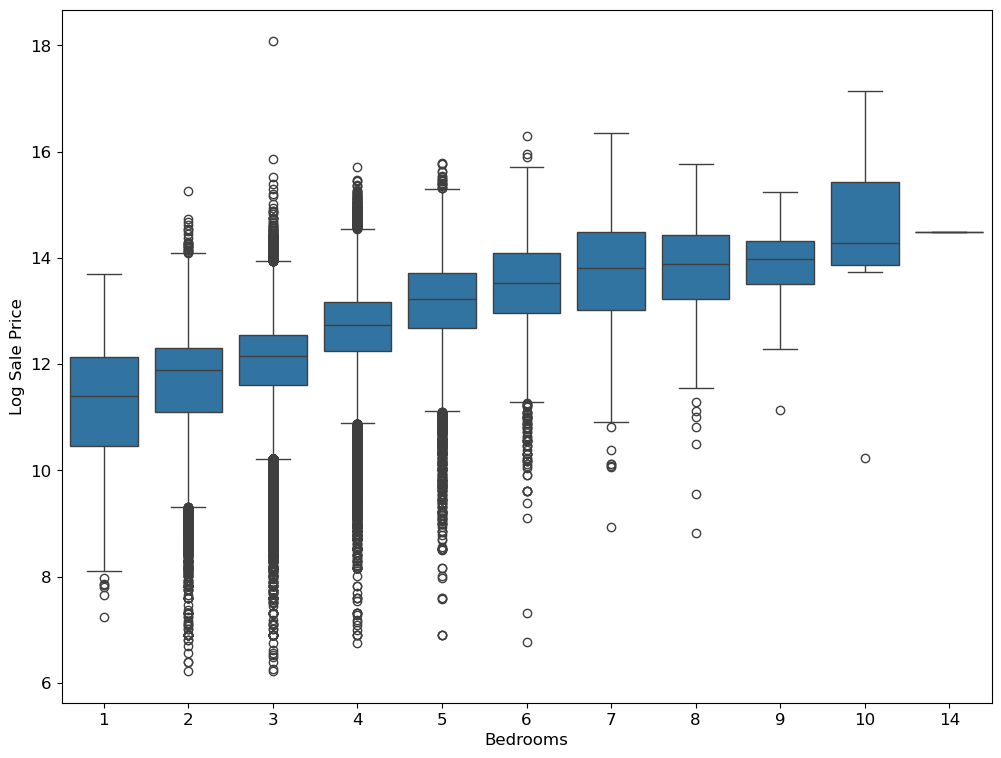

In [152]:
sns.boxplot(data = training_data, x = "Bedrooms", y = "Log Sale Price")

In [161]:
training_data_mapped = substitute_roof_material(training_data)
training_data_mapped.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bathrooms,Bedrooms,Rooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,Shingle/Asphalt,1.0,1.0,...,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,1.0,3,6
2,25221150230000,202,210,4375.0,70,0.0,2.0,Shingle/Asphalt,2.0,3.0,...,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,1.0,3,7
3,10251130030000,203,220,4375.0,17,0.0,3.0,Shingle/Asphalt,1.0,3.0,...,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,1.5,3,5
4,31361040550000,202,120,8400.0,32,0.0,3.0,Shingle/Asphalt,2.0,3.0,...,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,1.0,2,5
6,30314240080000,203,181,10890.0,37,0.0,1.0,Shingle/Asphalt,1.0,3.0,...,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,1.5,4,6


In [175]:
training_data_ohe = ohe_roof_material(training_data_mapped)
training_data_ohe.filter(regex = '^Roof Material_').head(10)                            

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar & Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0


In [179]:
training_data.to_csv('training_data.csv', index=False)